In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm 

D:\Archivos de Programa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Distribucion Normal (Continua)

Cuando realizamos analisis o investigacion cuantitativa, estamos interesados en una poblacion. 
Por ejemplo:
    - El promedio de calificaciones de alumnos de primer ciclo.
    - El numero de clientes que entran a McDonald's entre las 12 y 2 de la tarde.
    - La prevalencia de depresion en personas mayores a 65 años.

Sin embargo, debido al tiempo y costo, casi siempre usamos una muestra representativa de la poblacion, pero esta muestra
siempre es una aproximacion o estimacion de la poblacion.

Mientras nuestra muestra $n$ sea mas pequeña, es menos seguro que esta sea representativa con respecto a la poblacion, es decir existe un mayor riesgo de error. Adicionalmente, casi nunca sabemos nada sobre la poblacion que analizamos, no conocemos su media, su varianza o desviacion estandar. 

## Tamaño de la muestra

- Es seguro, que mientras mas grande es nuestra muestra, esta es mas representativa de la poblacion total.
- En una muestra grande, podemos capturar la variacion natural y diversidad de los datos de nuestra poblacion. 
- En una muestra pequeña, aumenta el riesgo a perder esa variacion y diversidad. 

Existe un punto, donde aumentar el tamaño de nuestra muestra no ofrece mas valor ni beneficios estadisticos (lo que es bueno
por que hace el analisis mas facil).

1. Cuando nuestra muestra es menor a 30.  $n <= 30$ se recomienda usar la distribucion T. 
2. Cuando nuestra muestra es mayor a 30. $n > 30$ se recomeinda usar la distribucion Z.
3. Si nuestra muestra es mayor a 100 $n >= 100$, no existe diferencia entre usar la distribucion T o distribucion Z (la diferencia es insignificante).


## Funcion de Desnsidad

Cuando una variable aleatoria X tiene distribucion normal o gaussiana de parametros $\mu$ y $\sigma$, $X \approx N(\mu, \sigma)$ si su funcion de densidad es:
<br><br>
<center> $\Large fx(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x - \mu)^2}{2\sigma ^2}} $ </center>

- **Esperanza** $E(X) = \mu $
- **Varianza** $Var(X) = \sigma^2 $

En particular, si Z sigue una distribucion estandar,
- **Esperanza** $E(X)$  = 0
- **Varianza** $Var(X)$ = 1

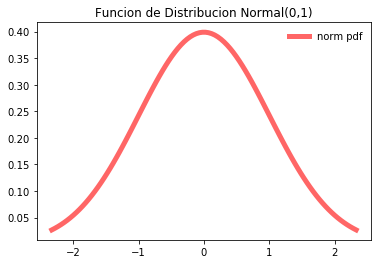

In [2]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
              norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.legend(loc='best', frameon=False)
ax.title.set_text("Funcion de Distribucion Normal(0,1)")
plt.show()

**Estandarizacion de una v.a. normal.** Si X es una v.a. $N(\mu, \sigma)$, entonces:
<br><br>
<center>$\large Z = \frac{X - \mu}{\sigma} \sim N(0,1) $</center>

Las probabilidades de una normal estandar Z determinan las de cualquier X de tipo $N(\mu, \sigma)$:
<br><br>
<center> $\large P(X \leq x) = p(Z \leq \frac{x - \mu}{\sigma}) $</center>

## Ejemplo: 
Pertenecemos a la coporacion de Apple y nos indican que los retornos diarios promedio se encuentran en 0.11% ($\mu = 0.11$%) y tienen una desviacion estandar de 1.84% ($\sigma = 1.84$%). Nos piden lo siguiente:

1. ¿Cual es la probabilidad, que en cualquier dia el retorno sea mayor a 0.5%?
2. ¿Cual es la probabilidad, que en cualquier dia la perdida sea menor a 2%?
3. ¿Cual es la probabilidad, que en cualquier dia el retorno este entre 0% y 1%?
4. ¿Cual es la probabilidad, que en cualquier dia la ganancia o perdida sea mayor a 3%?

Respuesta a la pregunta n° 1:
El valor Z luego de normalizar 0.5 es:  0.21195652173913043
Calculamos la probabilidad acumulada de 0.21:  0.5839295228810458
La probabilidad que el retorno sea mayor a 0.5% es:  0.4160704771189542


Respuesta a la pregunta n° 2:
El valor Z luego de normalizar -2 es:  -1.1467391304347825
Calculamos la probabilidad acumulada de -2:  0.1257447264513341
La probabilidad que la perdida este por debajo de 2% es:  0.1257447264513341


Respuesta a la pregunta n° 3:
Calculamos la probabilidad acumulada de 0%:  0.4761643885250646
Calculamos la probabilidad acumulada de 1%:  0.6856990603535713
La probabilidad que el retorno este entre 0% y 1% es:  0.2095346718285067


Respuesta a la pregunta n° 4:
Calculamos la probabilidad acumulada de -3%:  0.04549318618550101
Calculamos la probabilidad acumulada de +3%:  0.05813173195079435
La probabilidad que la ganancia o perdida sea mayor a 3% es:  0.10362491813629537


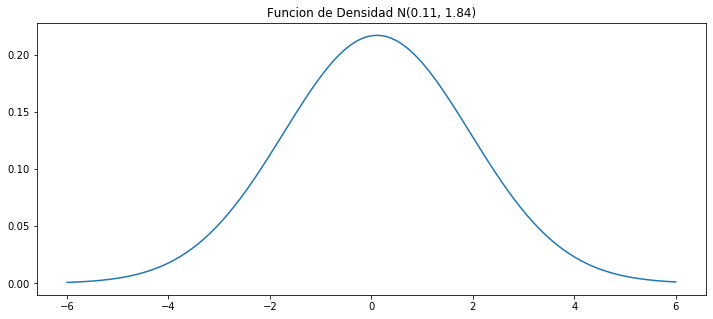

In [6]:
plt.figure(1, figsize=(12,5))

loc = 0.11 # mean
scale = 1.84 # std
print('Respuesta a la pregunta n° 1:')
print('El valor Z luego de normalizar 0.5 es: ', (0.5 - loc)/scale)
print('Calculamos la probabilidad acumulada de 0.21: ', norm.cdf(0.5, loc, scale))
print('La probabilidad que el retorno sea mayor a 0.5% es: ', 1 - norm.cdf(0.5, loc, scale))
print('\n')
print('Respuesta a la pregunta n° 2:')
print('El valor Z luego de normalizar -2 es: ', (-2 - loc)/scale)
print('Calculamos la probabilidad acumulada de -2: ', norm.cdf(-2, loc, scale))
print('La probabilidad que la perdida este por debajo de 2% es: ', norm.cdf(-2, loc, scale))
print('\n')
print('Respuesta a la pregunta n° 3:')
print('Calculamos la probabilidad acumulada de 0%: ', norm.cdf(0, loc, scale))
print('Calculamos la probabilidad acumulada de 1%: ', norm.cdf(1, loc, scale))
print('La probabilidad que el retorno este entre 0% y 1% es: ', norm.cdf(1, loc, scale) - norm.cdf(0, loc, scale))
print('\n')
print('Respuesta a la pregunta n° 4:')
print('Calculamos la probabilidad acumulada de -3%: ', norm.cdf(-3, loc, scale))
print('Calculamos la probabilidad acumulada de +3%: ', 1 - norm.cdf(3, loc, scale))
print('La probabilidad que la ganancia o perdida sea mayor a 3% es: ', norm.cdf(-3, loc, scale) + 1 - norm.cdf(3, loc, scale))

x = np.linspace(-6,6,200)
plt.plot(x,norm.pdf(x, loc, scale))
plt.title('Funcion de Densidad N(0.11, 1.84)')
plt.show()

# ¿Es mi Data Normal? 

Existen distintos formas de verificar si nuestra data presenta una distribucion normal, en este caso usaremos los QQ-Plots.

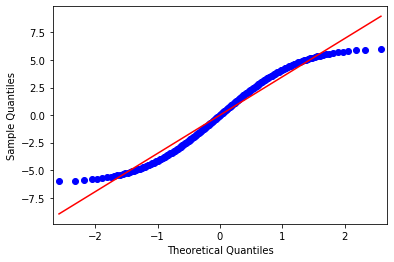

In [4]:
sm.qqplot(x, dist='norm', line='s')
plt.show()

En el grafico podmeos observar que nuestros datos estan cercanos a la linea teorica trazada, por lo que podemos afirmar que nuestra data presenta una distribucion normal.
